In [1]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import pickle

In [2]:
# Combined classifier which collects votes from all the classifiers and then classifies the tweet.
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [3]:
positive = open("positive.txt","r", encoding="ISO-8859-1").read() # positive sentences. 
negative = open("negative.txt","r", encoding="ISO-8859-1").read() # negative sentences. 

In [4]:
documents = []

# combining the data into one.
for r in positive.split('\n'):
    documents.append( (r, "pos") )

for r in negative.split('\n'):
    documents.append( (r, "neg") )
    
all_words = []

# tokenize the positive and negative sentences.
positive_words = word_tokenize(positive)
negative_words = word_tokenize(negative)

for w in positive_words:
    all_words.append(w.lower())

for w in negative_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

# Get the 5000 most common words.
word_features = [w[0] for w in all_words.most_common(5000)]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

# Training and Testing Data      
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]

#### Decision Tree Classifier 

In [5]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = SklearnClassifier(DecisionTreeClassifier(max_depth  = 5, min_samples_split = 490, random_state = 0))
decisionTreeClassifier.train(training_set)
print("Decision Tree accuracy:", (nltk.classify.accuracy(decisionTreeClassifier, testing_set))*100)

Decision Tree accuracy: 59.78915662650602


In [ ]:
save_classifier = open("Pickled_Algorithms/decisionTreeClassifier.pickle","wb")
pickle.dump(decisionTreeClassifier, save_classifier)
save_classifier.close()

#### Multinomial Naiye Bayes Classifier 

In [6]:
from sklearn.naive_bayes import MultinomialNB
MNBClassifier = SklearnClassifier(MultinomialNB())
MNBClassifier.train(training_set)
print("Multinomial Naiye Bayes accuracy:", (nltk.classify.accuracy(MNBClassifier, testing_set))*100)

Multinomial Naiye Bayes accuracy: 76.05421686746988


In [ ]:
save_classifier = open("Pickled_Algorithms/MNBClassifier.pickle","wb")
pickle.dump(MNBClassifier, save_classifier)
save_classifier.close()

#### Bernoulli Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import BernoulliNB
BNBClassifier = SklearnClassifier(MultinomialNB())
BNBClassifier.train(training_set)
print("Bernoulli Naive Bayes accuracy:", (nltk.classify.accuracy(BNBClassifier, testing_set))*100)

Bernoulli Naive Bayes accuracy: 76.05421686746988


In [ ]:
save_classifier = open("Pickled_Algorithms/BNBClassifier.pickle","wb")
pickle.dump(BNBClassifier, save_classifier)
save_classifier.close()

#### Logistic Regression Classifier

In [8]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionClassifier = SklearnClassifier(LogisticRegression())
LogisticRegressionClassifier.train(training_set)
print("Logistic Regression accuracy:", (nltk.classify.accuracy(LogisticRegressionClassifier, testing_set))*100)

Logistic Regression accuracy: 75.30120481927712


In [ ]:
save_classifier = open("Pickled_Algorithms/LogisticRegressionClassifier.pickle","wb")
pickle.dump(LogisticRegressionClassifier, save_classifier)
save_classifier.close()

#### Stochastic Gradient Descent Classifier

In [9]:
from sklearn.linear_model import SGDClassifier
SGDClassifier = SklearnClassifier(SGDClassifier())
SGDClassifier.train(training_set)
print("Stochastic Gradient Descent accuracy:", (nltk.classify.accuracy(SGDClassifier, testing_set))*100)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Stochastic Gradient Descent accuracy: 75.30120481927712


In [ ]:
save_classifier = open("Pickled_Algorithms/SGDClassifier.pickle","wb")
pickle.dump(SGDClassifier, save_classifier)
save_classifier.close()

####  Linear SVC

In [10]:
from sklearn.svm import LinearSVC
LinearSVCClassifier = SklearnClassifier(LinearSVC())
LinearSVCClassifier.train(training_set)
print("Linear SVC accuracy:", (nltk.classify.accuracy(LinearSVCClassifier, testing_set))*100)

Linear SVC accuracy: 71.83734939759037


In [ ]:
save_classifier = open("Pickled_Algorithms/LinearSVCClassifier.pickle","wb")
pickle.dump(LinearSVCClassifier, save_classifier)
save_classifier.close()

####  NuSVC

In [11]:
from sklearn.svm import NuSVC
NuSVCClassifier = SklearnClassifier(NuSVC())
NuSVCClassifier.train(training_set)
print("NuSVC accuracy:", (nltk.classify.accuracy(NuSVCClassifier, testing_set))*100)

NuSVC accuracy: 75.75301204819277


In [ ]:
save_classifier = open("Pickled_Algorithms/NuSVCClassifier.pickle","wb")
pickle.dump(NuSVCClassifier, save_classifier)
save_classifier.close()

#### Vote Classifier (Combined Classifier) 

In [12]:
votedClassifier = VoteClassifier(decisionTreeClassifier, MNBClassifier, BNBClassifier, LogisticRegressionClassifier, 
                                  SGDClassifier, LinearSVCClassifier, NuSVCClassifier)

print("VotedClassifier accuracy percent:", (nltk.classify.accuracy(votedClassifier, testing_set))*100)

VotedClassifier accuracy percent: 76.35542168674698


In [ ]:
# Function to determine the sentiment of given texr.
def sentiment(text):
    feats = find_features(text)
    return votedClassifier.classify(feats),votedClassifier.confidence(feats) # returning the sentiment and the confidence.

### After pickling all the classifiers, all the code can be saved in a module as below. 

In [ ]:
'''
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import pickle

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
    
positive = open("positive.txt","r", encoding="ISO-8859-1").read()
negative = open("negative.txt","r", encoding="ISO-8859-1").read()

documents = []

for r in positive.split('\n'):
    documents.append( (r, "pos") )

for r in negative.split('\n'):
    documents.append( (r, "neg") )
    
all_words = []

positive_words = word_tokenize(positive)
negative_words = word_tokenize(negative)

for w in positive_words:
    all_words.append(w.lower())

for w in negative_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = [w[0] for w in all_words.most_common(5000)]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

# Training and Testing Data      
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]

open_file = open("Pickled_Algorithms/decisionTreeClassifier.pickle", "rb")
decisionTreeClassifier = pickle.load(open_file)
open_file.close()

open_file = open("Pickled_Algorithms/MNBClassifier.pickle", "rb")
MNBClassifier = pickle.load(open_file)
open_file.close()

open_file = open("Pickled_Algorithms/BNBClassifier.pickle", "rb")
BNBClassifier = pickle.load(open_file)
open_file.close()

open_file = open("Pickled_Algorithms/LogisticRegressionClassifier.pickle", "rb")
LogisticRegressionClassifier = pickle.load(open_file)
open_file.close()

open_file = open("Pickled_Algorithms/SGDClassifier.pickle", "rb")
SGDClassifier = pickle.load(open_file)
open_file.close()

open_file = open("Pickled_Algorithms/LinearSVCClassifier.pickle", "rb")
LinearSVCClassifier = pickle.load(open_file)
open_file.close()

open_file = open("Pickled_Algorithms/NuSVCClassifier.pickle", "rb")
NuSVCClassifier = pickle.load(open_file)
open_file.close()

votedClassifier = VoteClassifier(decisionTreeClassifier, MNBClassifier, BNBClassifier, LogisticRegressionClassifier, 
                                  SGDClassifier, LinearSVCClassifier, NuSVCClassifier)

print("VotedClassifier accuracy percent:", (nltk.classify.accuracy(votedClassifier, testing_set))*100)

def sentiment(text):
    feats = find_features(text)
    return votedClassifier.classify(feats),votedClassifier.confidence(feats)

'''


## Running the Vote Classifier on Tweets. 

### Streaming tweets from Twitter API. 

In [13]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import json

In [14]:
#API keys and tokens
ckey="CKEY"
csecret="CSECRET"
atoken="AUTH-TOKEN"
asecret="AUTH-SECRET"

In [15]:
class listener(StreamListener):
    def on_data(self, data):
        all_data = json.loads(data)
        tweet = all_data["text"]
        sentiment_value, confidence = sentiment(tweet)
        print(tweet, sentiment_value, confidence)

        if confidence*100 >= 70:
            output = open("twitter-out.txt","a")
            output.write('Tweet: {}, Sentiment: {}., Confidence: {}'.format(tweet, sentiment_value, confidence))
            output.write('\n')
            output.close()

        return True
        
    
    def on_error(self, status):
        print(status)

In [ ]:
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["Avengers"])

## Graphing the sentiments of the tweets using Matplotlib. 

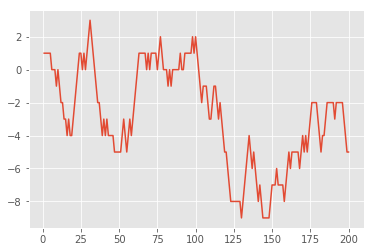

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')

    xarray = []
    yarray = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xarray.append(x)
        yarray.append(y)
        
    ax1.clear()
    ax1.plot(xarray,yarray)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show();